In [1]:
import numpy as np
import pandas as pd
import scipy as sp

from uncertainties import ufloat, unumpy, umath

from scipy.interpolate import interp1d
from scipy.stats import norm
from scipy.integrate import quad

import matplotlib
import matplotlib.pyplot as plt

from ipywidgets import interact, FloatSlider

import io

from tqdm import tqdm_notebook as tqdm

import os

In [2]:
import seaborn as sns
sns.set(style="ticks", palette="muted", rc={"xtick.bottom" : True, "ytick.left" : True})
#plt.style.use(os.environ['SCRIPTS_DIR'] + '/matplotlibrc')
plt.style.use('thinfig')

In [3]:
from tqdm import tqdm_notebook as tqdm

In [4]:
SSM = pd.read_table('std2/neutr_scl.dat', skiprows=29, nrows=5, sep='\s+',
                   names=['k', 'reaction', 'phi', 'Cl37', 'Ga71'])
SSM

,k,reaction,phi,Cl37,Ga71
0,1,pp,6.008630,0.000,70.90
1,2,pep,0.014766,0.236,3.17
2,3,Be7,0.484016,1.162,35.43
3,4,B8,0.000499,5.442,12.13
4,5,CN,0.017854,0.152,3.17


In [5]:
SSM['phi'].values[4]

0.0178544

In [6]:
np.sum(SSM['Cl37'])
np.sum(SSM['Ga71'])

124.8

In [7]:
tmp = pd.read_table('gongs/r1/5/neutr_scl.dat', skiprows=29, nrows=5, sep='\s+',
                   names=['k', 'reaction', 'phi', 'Cl37', 'Ga71'])
tmp

,k,reaction,phi,Cl37,Ga71
0,1,pp,6.036310,0.000,71.23
1,2,pep,0.014597,0.234,3.14
2,3,Be7,0.460772,1.106,33.73
3,4,B8,0.000439,4.782,10.66
4,5,CN,0.015478,0.132,2.75


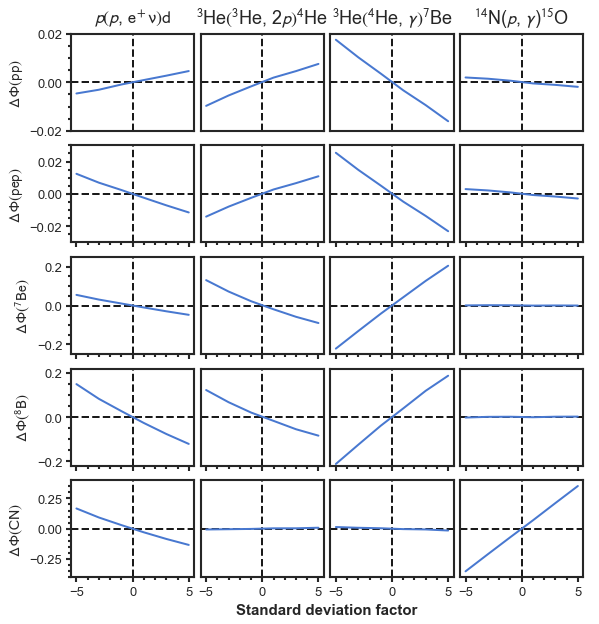

In [8]:
#norm = matplotlib.colors.Normalize(vmin=-5, vmax=5)
#cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.RdBu)

fig, ax = plt.subplots(5, 4, sharex=True, sharey=False, figsize=(8, 10))
axes = ax.flatten()

plt.xlim([-5.5, 5.5])

sigmas = range(-5, 6, 2)

counter = 0
for k in range(5):
    axmin = 0
    axmax = 0
    for rate in ['r1', 'r2', 'r3', 'r5']:
        ax = axes[counter]
        counter += 1
        
        if rate != 'r1':
            ax.yaxis.set_visible(False)
        
        if k == 0:
            ax.xaxis.set_visible(False)
            if rate == 'r1':
                ax.set_title(r'$p(p$, $\rm{e}^{+}\,\nu)d$')
            elif rate == 'r2':
                ax.set_title(r'$^3$He$(^3$He, 2$p)^4$He')
            elif rate == 'r3':
                ax.set_title(r'$^3$He$(^4$He, $\gamma)^7$Be')
            elif rate == 'r5':
                ax.set_title(r'$^{14}$N($p$, $\gamma$)$^{15}$O')
            #ax.set_ylim([-0.007, 0.007])
        #else:
        #    ax.set_ylim([-0.034, 0.034])
        
        #ax.set_xticks([0.25, 0.75])
        
        if rate == 'r1':
            if k == 0:
                ax.set_ylabel(r'$\Delta\,\Phi(\rm{pp})$')
            if k == 1:
                ax.set_ylabel(r'$\Delta\,\Phi(\rm{pep})$')
            if k == 2:
                ax.set_ylabel(r'$\Delta\,\Phi(^7\rm{Be})$')
            if k == 3:
                ax.set_ylabel(r'$\Delta\,\Phi(^8\rm{B})$')
            if k == 4:
                ax.set_ylabel(r'$\Delta\,\Phi(\rm{CN})$')
        
        deltas = []
        for ii in sigmas:
            rates = pd.read_table('gongs/' + rate + '/' + str(ii) + '/neutr_scl.dat', 
                   skiprows=29, nrows=5, sep='\s+',
                   names=['k', 'reaction', 'phi', 'Cl37', 'Ga71'])
            SSM_ = SSM['phi'].values[k]
            deltas += [(rates['phi'].values[k] - SSM_)/SSM_]
        ax.plot(sigmas, deltas, zorder=10)
        
        if k == 0:
            ax.set_ylim([-0.02, 0.02])
        if k == 1:
            ax.set_ylim([-0.03, 0.03])
        if k == 2:
            ax.set_ylim([-0.25, 0.25])
        if k == 3:
            ax.set_ylim([-0.22, 0.22])
        if k == 4:
            ax.set_ylim([-0.4, 0.4])
        
        #ax.grid()
        ax.axhline(0, c='k', ls='--')
        ax.axvline(0, c='k', ls='--')

plt.subplots_adjust(wspace=0.05, hspace=0.15, left=0.01)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'Standard deviation factor')

#plt.savefig('allrates-struc.pdf', bbox_inches='tight')#, dpi=400)
plt.show()

In [9]:
unc = [0.035, 0.013e-2, 0.23e-1, 0.11e-4]
unc

[0.035, 0.00013, 0.023, 1.1e-05]

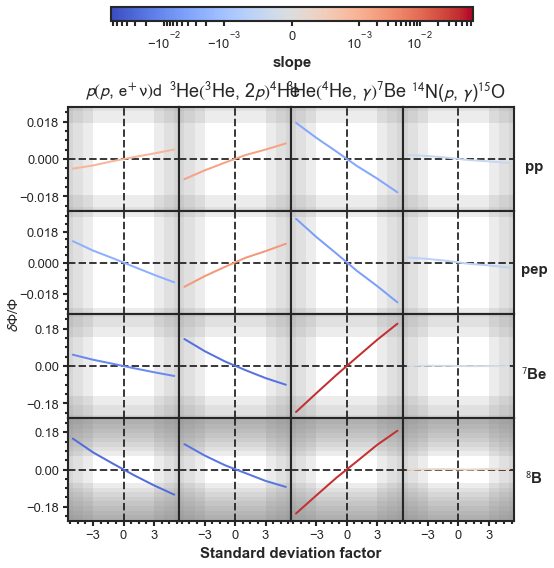

In [10]:
norm = matplotlib.colors.SymLogNorm(1e-3, linscale=1.0, vmin=-0.075, vmax=0.075, clip=False, base=10)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.get_cmap(matplotlib.cm.coolwarm, 11))

fig, ax = plt.subplots(4, 4, sharex=True, sharey=False, figsize=(8, 10))
axes = ax.flatten()

plt.xlim([-5.5, 5.5])

sigmas = np.array(range(-5, 6, 2))

counter = 0
for k in range(4):
    axmin = 0
    axmax = 0
    SSM_ = SSM['phi'].values[k]
    for rate in ['r1', 'r2', 'r3', 'r5']:
        ax = axes[counter]
        counter += 1
        
        if rate != 'r1':
            ax.yaxis.set_visible(False)
        
        if k == 0:
            ax.xaxis.set_visible(False)
            if rate == 'r1':
                ax.set_title(r'$p(p$, $\rm{e}^{+}\,\nu)d$')
            elif rate == 'r2':
                ax.set_title(r'$^3$He$(^3$He, 2$p)^4$He')
            elif rate == 'r3':
                ax.set_title(r'$^3$He$(^4$He, $\gamma)^7$Be')
            elif rate == 'r5':
                ax.set_title(r'$^{14}$N($p$, $\gamma$)$^{15}$O')
        
        ax.set_xticks([-3, 0, 3])
        if k == 0:
            ax.set_ylim([-0.025, 0.025])
            ax.set_yticks([-0.018, 0, 0.018])
        if k == 1:
            ax.set_ylim([-0.03, 0.03])
            ax.set_yticks([-0.018, 0, 0.018])
        if k == 2:
            ax.set_ylim([-0.25, 0.25])
            ax.set_yticks([-0.18, 0, 0.18])
        if k == 3:
            ax.set_ylim([-0.25, 0.25])
            ax.set_yticks([-0.18, 0, 0.18])
        if k == 4:
            ax.set_ylim([-0.4, 0.4])
            ax.set_yticks([-0.28, 0, 0.28])
        
        if rate == 'r5':
            ax.yaxis.set_visible(True)
            ax.set_yticks([])
            ax.set_yticks([], minor=True)
            ax.yaxis.set_label_position("right")
            if k == 0:
                ax.set_ylabel(r'pp',rotation=0, labelpad=20)
            if k == 1:
                ax.set_ylabel(r'pep',rotation=0, labelpad=20)
            if k == 2:
                ax.set_ylabel(r'$^7$Be',rotation=0, labelpad=20)
            if k == 3:
                ax.set_ylabel(r'$^8$B',rotation=0, labelpad=20)
            if k == 4:
                ax.set_ylabel(r'CN',rotation=0, labelpad=20)
        
        deltas = []
        for ii in sigmas:
            rates = pd.read_table('gongs/' + rate + '/' + str(ii) + '/neutr_scl.dat', 
                   skiprows=29, nrows=5, sep='\s+',
                   names=['k', 'reaction', 'phi', 'Cl37', 'Ga71'])
            deltas += [(rates['phi'].values[k] - SSM_)/SSM_]
        slope = np.sum(sigmas * deltas) / np.sum(sigmas**2)
        ax.plot(sigmas, deltas, c=cmap.to_rgba(slope), zorder=10)
        
        alpha = 0.1
        upper = 20
        ax.axhspan( unc[k]*3/SSM_,  unc[k]*upper/SSM_, color='gray', alpha=1.5*alpha, ec=None, lw=0)
        ax.axhspan(-unc[k]*3/SSM_, -unc[k]*upper/SSM_, color='gray', alpha=1.5*alpha, ec=None, lw=0)
        ax.axvspan( 3,     10, color='gray', alpha=1.5*alpha, ec=None, lw=0)
        ax.axvspan(-3, -upper, color='gray', alpha=1.5*alpha, ec=None, lw=0)
        for jj in range(4, upper):
            ax.axhspan( unc[k]*jj/SSM_,  unc[k]*upper/SSM_, color='gray', alpha=alpha, ec=None, lw=0)
            ax.axhspan(-unc[k]*jj/SSM_, -unc[k]*upper/SSM_, color='gray', alpha=alpha, ec=None, lw=0)
            ax.axvspan( jj,  upper, color='gray', alpha=alpha, ec=None, lw=0)
            ax.axvspan(-jj, -upper, color='gray', alpha=alpha, ec=None, lw=0)
        
        ax.axhline(0, c='k', ls='--', alpha=0.85)
        ax.axvline(0, c='k', ls='--', alpha=0.85)

plt.subplots_adjust(wspace=0, hspace=0, top=0.7)
cbar_ax = fig.add_axes([0.2, 0.82, 0.628, 0.02])
cbar = plt.colorbar(cmap, cax=cbar_ax, label=r'slope',
                   orientation='horizontal')
cbar.ax.minorticks_off()

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'Standard deviation factor')
plt.ylabel(r'$\delta\Phi/\Phi$', labelpad=20)

plt.savefig('allrates-fluxes.pdf', bbox_inches='tight')#, dpi=400)
plt.show()

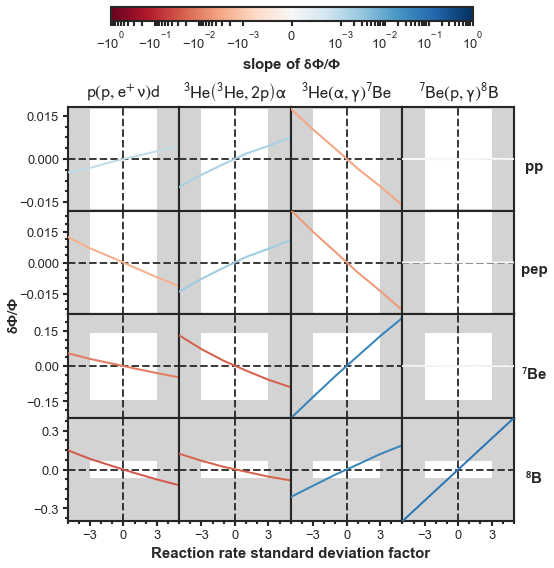

In [15]:
#norm = matplotlib.colors.SymLogNorm(1e-3, linscale=1.0, vmin=-0.075, vmax=0.075, clip=False, base=10)
norm = matplotlib.colors.SymLogNorm(1e-3, linscale=1.0, vmin=-1, vmax=1, clip=False, base=10)
#norm = matplotlib.colors.BoundaryNorm([-1, -1e-1, -1e-2, -1e-3, 0, 1e-3, 1e-2, 1e-1, 1], ncolors=11)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.get_cmap(matplotlib.cm.RdBu, 11))

fig, ax = plt.subplots(4, 4, sharex=True, sharey=False, figsize=(8, 10))
axes = ax.flatten()

plt.xlim([-5, 5])

sigmas = np.array(range(-5, 6, 2))

counter = 0
for k in range(4):
    axmin = 0
    axmax = 0
    SSM_ = SSM['phi'].values[k]
    for rate in ['r1', 'r2', 'r3', 'r4']:
        ax = axes[counter]
        counter += 1
        
        if rate != 'r1':
            ax.yaxis.set_visible(False)
        
        if k == 0:
            ax.xaxis.set_visible(False)
            if rate == 'r1':
                ax.set_title(r'$\rm{p}\left(\rm{p}, \rm{e}^{+}\,\nu\right)d$')
            elif rate == 'r2':
                ax.set_title(r'$^3\rm{He}\left(^3\rm{He}, 2\rm{p}\right)\alpha$')
            elif rate == 'r3':
                ax.set_title(r'$^3\rm{He}\left(\alpha, \gamma\right)^7\rm{Be}$')
            elif rate == 'r4':
                ax.set_title(r'$^7\rm{Be}(\rm{p}, \gamma)^8\rm{B}$')
        
        #ax.set_xticks([-3, 0, 3])
        ax.set_xticks(np.linspace(-3, 3, 3))
        ax.set_xticks(np.arange(-5, 6, 1), minor=True)
        if k == 0:
            ax.set_ylim([-0.018, 0.018])
            ax.set_yticks([-0.015, 0, 0.015])
        if k == 1:
            ax.set_ylim([-0.025, 0.025])
            ax.set_yticks([-0.015, 0, 0.015])
        if k == 2:
            ax.set_ylim([-0.22, 0.22])
            ax.set_yticks([-0.15, 0, 0.15])
        if k == 3:
            ax.set_ylim([-0.4, 0.4])
            ax.set_yticks([-0.3, 0, 0.3])
        
        if rate == 'r4':
            ax.yaxis.set_visible(True)
            ax.set_yticks([])
            ax.set_yticks([], minor=True)
            ax.yaxis.set_label_position("right")
            if k == 0:
                ax.set_ylabel(r'pp',rotation=0, labelpad=20)
            if k == 1:
                ax.set_ylabel(r'pep',rotation=0, labelpad=20)
            if k == 2:
                ax.set_ylabel(r'$^\mathbf{7}$Be',rotation=0, labelpad=20)
            if k == 3:
                ax.set_ylabel(r'$^\mathbf{8}$B',rotation=0, labelpad=20)
            if k == 4:
                ax.set_ylabel(r'CN',rotation=0, labelpad=20)
        
        deltas = []
        for ii in sigmas:
            rates = pd.read_table('gongs/' + rate + '/' + str(ii) + '/neutr_scl.dat', 
                   skiprows=29, nrows=5, sep='\s+',
                   names=['k', 'reaction', 'phi', 'Cl37', 'Ga71'])
            deltas += [(rates['phi'].values[k] - SSM_)/SSM_]
        slope = np.sum(sigmas * deltas) / np.sum(sigmas**2)
        ax.plot(sigmas, deltas, c=cmap.to_rgba(slope), zorder=10)
        
        ax.axhspan( unc[k]*3/SSM_,  unc[k]*100/SSM_, color='lightgray', alpha=1, ec=None, lw=0)
        ax.axhspan(-unc[k]*3/SSM_, -unc[k]*100/SSM_, color='lightgray', alpha=1, ec=None, lw=0)
        ax.axvspan( 3,  100, color='lightgray', alpha=1, ec=None, lw=0)
        ax.axvspan(-3, -100, color='lightgray', alpha=1, ec=None, lw=0)
        
        #ax.axhspan( unc[k]*3/SSM_,  unc[k]*100/SSM_, color='k', alpha=0.2, ec=None, lw=0, zorder=1000)
        #ax.axhspan(-unc[k]*3/SSM_, -unc[k]*100/SSM_, color='k', alpha=0.2, ec=None, lw=0, zorder=1000)
        #ax.axvspan( 3,  100, color='k', alpha=0.2, ec=None, lw=0, zorder=1000)
        #ax.axvspan(-3, -100, color='k', alpha=0.2, ec=None, lw=0, zorder=1000)
        
        ax.axhline(0, c='k', ls='--', alpha=0.85)
        ax.axvline(0, c='k', ls='--', alpha=0.85)

plt.subplots_adjust(wspace=0, hspace=0, top=0.7)
cbar_ax = fig.add_axes([0.2, 0.82, 0.628, 0.02])
cbar = plt.colorbar(cmap, cax=cbar_ax, label=r'slope of $\mathbf{\delta\Phi/\Phi}$',
                   orientation='horizontal')
cbar.ax.minorticks_off()

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'Reaction rate standard deviation factor')
plt.ylabel(r'$\mathbf{\delta\Phi/\Phi}$', labelpad=20)

plt.savefig('allrates-fluxes.pdf', bbox_inches='tight')#, dpi=400)
plt.show()

In [12]:
slopes = []
sigmas = np.array(range(-5, 6, 2))
for rate in ['r1', 'r2', 'r3', 'r5']:
    slopes_ = []
    for k in range(5):
        deltas = []
        for ii in sigmas:
            rates = pd.read_table('gongs/' + rate + '/' + str(ii) + '/neutr_scl.dat', 
                   skiprows=29, nrows=5, sep='\s+',
                   names=['k', 'reaction', 'phi', 'Cl37', 'Ga71'])
            SSM_ = SSM['phi'].values[k]
            deltas += [(rates['phi'].values[k] - SSM_)/SSM_]
        slope = np.sum(sigmas * deltas) / np.sum(sigmas**2)
        slopes_ += [slope]
    slopes += [slopes_]

slopes = np.array(slopes)
slopes

array([[ 0.0009347 , -0.00237418, -0.01021516, -0.02694883, -0.02988603],
       [ 0.00171663,  0.00247799, -0.02194532, -0.02055872,  0.0014283 ],
       [-0.00334122, -0.00482498,  0.04276417,  0.04017052, -0.0027405 ],
       [-0.00040083, -0.0006009 , -0.00013237,  0.00029915,  0.07021615]])

In [13]:
interps = {}
sigmas = np.array(range(-5, 6, 2))
for rate in ['r1', 'r2', 'r3', 'r4', 'r5']:
    for k in range(5):
        #SSM_ = SSM['phi'].values[k]
        #deltas = []
        Phis = []
        for ii in sigmas:
            rates = pd.read_table('gongs/' + rate + '/' + str(ii) + '/neutr_scl.dat', 
                   skiprows=29, nrows=5, sep='\s+',
                   names=['k', 'reaction', 'phi', 'Cl37', 'Ga71'])
            #deltas += [(rates['phi'].values[k] - SSM_)/SSM_]
            Phis += [rates['phi'].values[k]]
        interps[(rate, k)] = interp1d(sigmas, Phis, fill_value='extrapolate')

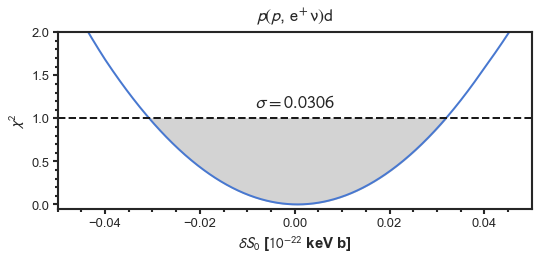

In [14]:
fig = plt.figure(figsize=(8.5,8.5/2.619))

ratename = r'$p(p$, $\rm{e}^{+}\,\nu)d$'
rate = 'r1'

factor = 1.5
sigmas = np.linspace(-factor, factor, 1000)
chi2s = []
for sigma in sigmas: 
    chi2 = 0
    for k in range(4):
        SSM_ = SSM['phi'].values[k]
        interp = interps[(rate, k)](sigma)
        chi2 += (interp - SSM_)**2/unc[k]**2
    chi2s += [chi2]
chi2s = np.array(chi2s)

r_std = 0.04
sigmas = sigmas * r_std
plt.plot(sigmas, chi2s)
plt.fill_between(sigmas[chi2s<=1], 1, chi2s[chi2s<=1], color='lightgray')
plt.xlabel(r'$\delta S_0$ [$10^{-22}$ keV b]')
plt.ylabel(r'$\chi^2$')
plt.axhline(1, ls='--', c='k')

plt.text(0, 1.125, s=r'$\sigma = ' + str(np.abs(sigmas[np.argmin(np.abs(chi2s-1))]))[:6] + r'$', ha='center')
plt.gca().set_title(ratename)

plt.ylim([-0.05, 2])
plt.xlim([-0.05, 0.05]);

In [15]:
fig = plt.figure(figsize=(8.5,8.5/2.619))

ratename = r'$p(p$, $\rm{e}^{+}\,\nu)d$'
rate = 'r1'

factor = 5
sigmas = np.linspace(-factor, factor, 1000)
probs = []
for sigma in sigmas: 
    prob = 0
    for k in range(4):
        SSM_ = SSM['phi'].values[k]
        interp = interps[(rate, k)](sigma)
        #prob += (interp - SSM_)**2/unc[k]**2
        prob += norm.logpdf(interp, SSM_, unc[k])
    probs += [prob]
probs = np.exp(np.array(probs)) 

interp_ = interp1d(sigmas, probs)
total = quad(interp_, sigmas[0], sigmas[-1])[0]
width = 0.001
result = 0
while result < 0.68:
    width += 0.001
    result = quad(interp_, -width, width)[0] / total

r_std = 0.04
sigmas = sigmas * r_std
plt.plot(sigmas, probs)
plt.xlabel(r'$\delta S_0$ [$10^{-22}$ keV b]')
plt.ylabel(r'pdf')

plt.axvline(width*r_std, ls='--', c='k')
plt.axvline(-width*r_std, ls='--', c='k')

plt.gca().set_title(ratename);

AttributeError: 'SymLogNorm' object has no attribute 'logpdf'

<Figure size 612x233.677 with 0 Axes>

In [ ]:
width * r_std

In [ ]:
quad(interp_, sigmas[0], sigmas[-1])[0]

In [ ]:
fig = plt.figure(figsize=(8.5,8.5/2.619))

plt.subplot(1,3,1)

ratename = r'$p(p$, $\rm{e}^{+}\,\nu)d$'
rate = 'r1'

factor = 1.5
sigmas = np.linspace(-factor, factor, 1000)
chi2s = []
for sigma in sigmas: 
    chi2 = 0
    for k in range(4):
        SSM_ = SSM['phi'].values[k]
        interp = interps[(rate, k)](sigma)
        chi2 += (interp - SSM_)**2/unc[k]**2
    chi2s += [chi2]
chi2s = np.array(chi2s)

r_std = 0.04
sigmas = sigmas * r_std
plt.plot(sigmas, chi2s)
plt.fill_between(sigmas[chi2s<=1], 1, chi2s[chi2s<=1], color='lightgray')
plt.xlabel(r'$\delta S_0$ [$10^{-22}$ keV b]')
plt.ylabel(r'$\chi^2$')
plt.axhline(1, ls='--', c='k')

plt.text(0, 1.125, s=r'$\sigma = ' + str(np.abs(sigmas[np.argmin(np.abs(chi2s-1))]))[:5] + r'$', ha='center')
plt.gca().set_title(ratename)

plt.ylim([-0.05, 2])
plt.xlim([-0.05, 0.05])




plt.subplot(1,3,2)

ratename = r'$^3$He$(^3$He, 2$p)^4$He'
rate = 'r2'

factor = 1.5
sigmas = np.linspace(-factor, factor, 1000)
chi2s = []
for sigma in sigmas: 
    chi2 = 0
    for k in range(4):
        SSM_ = SSM['phi'].values[k]
        interp = interps[(rate, k)](sigma)
        chi2 += (interp - SSM_)**2/unc[k]**2
    chi2s += [chi2]
chi2s = np.array(chi2s)

r_std = 0.27
sigmas = sigmas * r_std
plt.plot(sigmas, chi2s)
plt.fill_between(sigmas[chi2s<=1], 1, chi2s[chi2s<=1], color='lightgray')
plt.xlabel(r'$\delta S_0$ [$10^{3}$ keV b]')
plt.axhline(1, ls='--', c='k')

plt.text(0, 1.125, s=r'$\sigma = ' + str(np.abs(sigmas[np.argmin(np.abs(chi2s-1))]))[:4] + r'$', ha='center')
plt.gca().set_title(ratename)
plt.gca().set_yticklabels([])
plt.ylim([-0.05, 2])
plt.xlim([-0.4, 0.4])



plt.subplot(1,3,3)

ratename = r'$^3$He$(^4$He, $\gamma)^7$Be'
rate = 'r3'

factor = 1.5
sigmas = np.linspace(-factor, factor, 1000)
chi2s = []
for sigma in sigmas: 
    chi2 = 0
    for k in range(4):
        SSM_ = SSM['phi'].values[k]
        interp = interps[(rate, k)](sigma)
        chi2 += (interp - SSM_)**2/unc[k]**2
    chi2s += [chi2]
chi2s = np.array(chi2s)

r_std = 0.03
sigmas = sigmas * r_std 
plt.plot(sigmas, chi2s)
plt.fill_between(sigmas[chi2s<=1], 1, chi2s[chi2s<=1], color='lightgray')
plt.xlabel(r'$\delta S_0$ [keV b]', labelpad=10)
plt.axhline(1, ls='--', c='k')

plt.text(0, 1.125, 
         s=r'$\sigma = ' + str(np.abs(sigmas[np.argmin(np.abs(chi2s-1))]))[:5] + r'$', ha='center')
plt.gca().set_title(ratename)
plt.ylim([-0.05, 2])
plt.xlim([-0.025, 0.025])
plt.gca().set_yticklabels([])


plt.tight_layout()
#plt.savefig('S0_diffs_neutrinos.pdf')

In [ ]:
ratename = r'$^7$Be($p$, $\gamma$)$^8$B'
rate = 'r4'

factor = 1.5
sigmas = np.linspace(-factor, factor, 1000)
chi2s = []
for sigma in sigmas: 
    chi2 = 0
    for k in range(4):
        SSM_ = SSM['phi'].values[k]
        interp = interps[(rate, k)](sigma)
        chi2 += (interp - SSM_)**2/unc[k]**2
    chi2s += [chi2]
chi2s = np.array(chi2s)

r_std = 0.16
sigmas = sigmas * r_std 
plt.plot(sigmas, chi2s)
plt.fill_between(sigmas[chi2s<=1], 1, chi2s[chi2s<=1], color='lightgray')
plt.xlabel(r'$\delta S_0$ [$10^{-2}$ keV b]', labelpad=10)
plt.axhline(1, ls='--', c='k')

plt.text(0, 1.125, 
         s=r'$\sigma = ' + str(np.abs(sigmas[np.argmin(np.abs(chi2s-1))]))[:5] + r'$', ha='center')
plt.gca().set_title(ratename)
plt.ylim([-0.05, 2])
plt.xlim([-0.07, 0.07])
plt.ylabel(r'$\chi^2$');
#plt.gca().set_yticklabels([]);

In [ ]:
fig = plt.figure(figsize=(8.5,8.5/2.619))

plt.subplot(1,3,1)

ratename = r'$\rm{p}\left(\rm{p}, \rm{e}^{+}\,\nu\right)d$'
rate = 'r1'

factor = 1.5
sigmas = np.linspace(-factor, factor, 1000)
chi2s = []
for sigma in sigmas: 
    chi2 = 0
    for k in range(4):
        SSM_ = SSM['phi'].values[k]
        interp = interps[(rate, k)](sigma)
        chi2 += (interp - SSM_)**2/unc[k]**2
    chi2s += [chi2]
chi2s = np.array(chi2s)

r_std = 0.04
sigmas = sigmas * r_std
plt.plot(sigmas, chi2s)
plt.fill_between(sigmas[chi2s<=1], 1, chi2s[chi2s<=1], color='lightgray')
plt.xlabel(r'$\mathbf{\delta S_0}$ [$\mathbf{10^{-22}}$ keV b]')
plt.ylabel(r'$\mathbf{\chi^2}$')
plt.axhline(1, ls='--', c='k')

plt.text(0, 1.125, s=r'$\sigma = ' + str(np.abs(sigmas[np.argmin(np.abs(chi2s-1))]))[:5] + r'$', ha='center')
plt.gca().set_title(ratename)

plt.ylim([-0.05, 2])
plt.xlim([-0.05, 0.05])



plt.subplot(1,3,2)

ratename = r'$^3\rm{He}\left(\alpha, \gamma\right)^7\rm{Be}$'
rate = 'r3'

factor = 1.5
sigmas = np.linspace(-factor, factor, 1000)
chi2s = []
for sigma in sigmas: 
    chi2 = 0
    for k in range(4):
        SSM_ = SSM['phi'].values[k]
        interp = interps[(rate, k)](sigma)
        chi2 += (interp - SSM_)**2/unc[k]**2
    chi2s += [chi2]
chi2s = np.array(chi2s)

r_std = 0.03
sigmas = sigmas * r_std 
plt.plot(sigmas, chi2s)
plt.fill_between(sigmas[chi2s<=1], 1, chi2s[chi2s<=1], color='lightgray')
plt.xlabel(r'$\mathbf{\delta S_0}$ [keV b]', labelpad=10)
plt.axhline(1, ls='--', c='k')

plt.text(0, 1.125, 
         s=r'$\sigma = ' + str(np.abs(sigmas[np.argmin(np.abs(chi2s-1))]))[:5] + r'$', ha='center')
plt.gca().set_title(ratename)
plt.ylim([-0.05, 2])
plt.xlim([-0.025, 0.025])
plt.gca().set_yticklabels([])




plt.subplot(1,3,3)
ratename = r'$^7\rm{Be}\left(\rm{p}, \gamma\right)^8\rm{B}$'
rate = 'r4'

factor = 1.5
sigmas = np.linspace(-factor, factor, 1000)
chi2s = []
for sigma in sigmas: 
    chi2 = 0
    for k in range(4):
        SSM_ = SSM['phi'].values[k]
        interp = interps[(rate, k)](sigma)
        chi2 += (interp - SSM_)**2/unc[k]**2
    chi2s += [chi2]
chi2s = np.array(chi2s)

r_std = 0.16
sigmas = sigmas * r_std 
plt.plot(sigmas, chi2s)
plt.fill_between(sigmas[chi2s<=1], 1, chi2s[chi2s<=1], color='lightgray')
plt.xlabel(r'$\mathbf{\delta S_0}$ [$\mathbf{10^{-2}}$ keV b]', labelpad=10)
plt.axhline(1, ls='--', c='k')

plt.text(0, 1.125, 
         s=r'$\sigma = ' + str(np.abs(sigmas[np.argmin(np.abs(chi2s-1))]))[:5] + r'$', ha='center')
plt.gca().set_title(ratename)
plt.ylim([-0.05, 2])
plt.xlim([-0.07, 0.07])
plt.gca().set_yticklabels([]);


plt.tight_layout()
plt.savefig('S0_diffs_neutrinos.pdf')